In [1]:
#Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) 

#Read the Data



In [2]:
df =pd.read_csv(r'C:\Users\Omar Mohamed\Downloads\movies.csv')


In [3]:
#look at data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#if there a missing data

for col in df.columns :
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
#data type in movies

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#seting nan into 0 using fillna
missing_count = df.isna().sum()
print(missing_count)

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [8]:
#seting nan into 0 using fillna
df = df.fillna(0)
missing_count = df.isna().sum()
print(missing_count)

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


In [9]:
#changing data type

df['gross'] = df['gross'].astype('int64')
df['budget'] = df['budget'].astype('int64')

In [10]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [25]:
#cut a str in a spasefic point

df['yearcorrect']=df['released'].astype(str)
df['l']=df['yearcorrect'].str.split(',').str[1]
df['yearcorrect'] =df['l'].str.split(' ').str[1]

print(df['yearcorrect'])

0       1980
1       1980
2       1980
3       1980
4       1980
        ... 
7663    2020
7664    2020
7665    2020
7666    2020
7667    2020
Name: yearcorrect, Length: 7668, dtype: object


In [53]:
df['company'].dtypes


dtype('O')

In [39]:
#order by
df=df.sort_values(by=['gross'],inplace=False , ascending=False)

In [40]:
#budget high correlation
#company high correlation

Text(0, 0.5, 'budget')

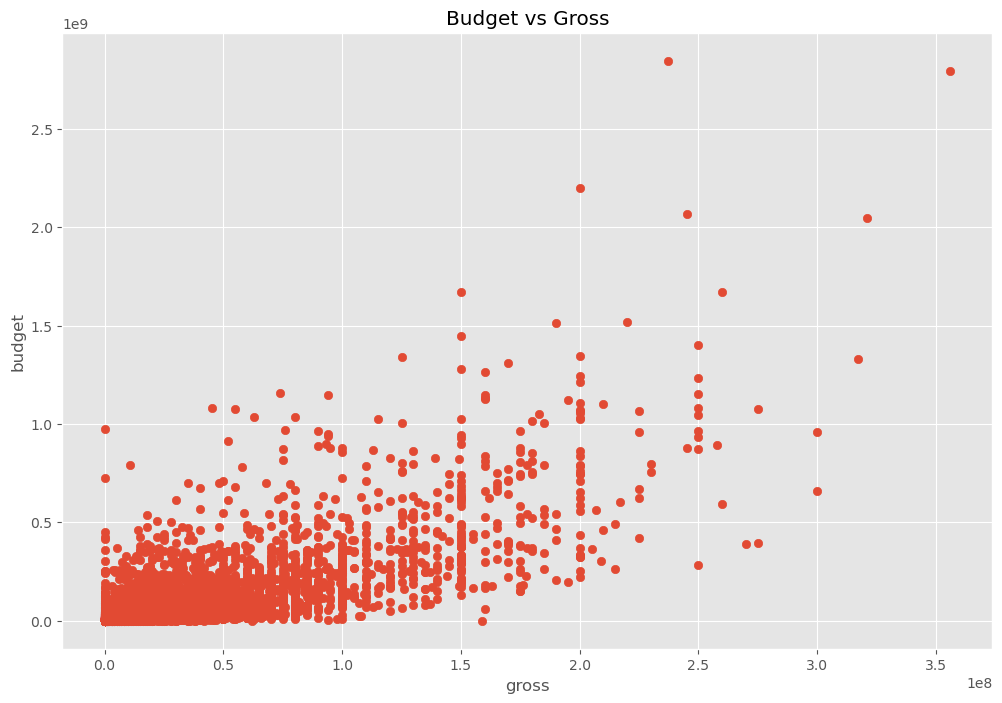

In [41]:
#scater plot

plt.scatter(x=df['budget'],y=df['gross'])
plt.title ('Budget vs Gross')
plt.xlabel('gross')
plt.ylabel('budget')

<Axes: xlabel='budget', ylabel='gross'>

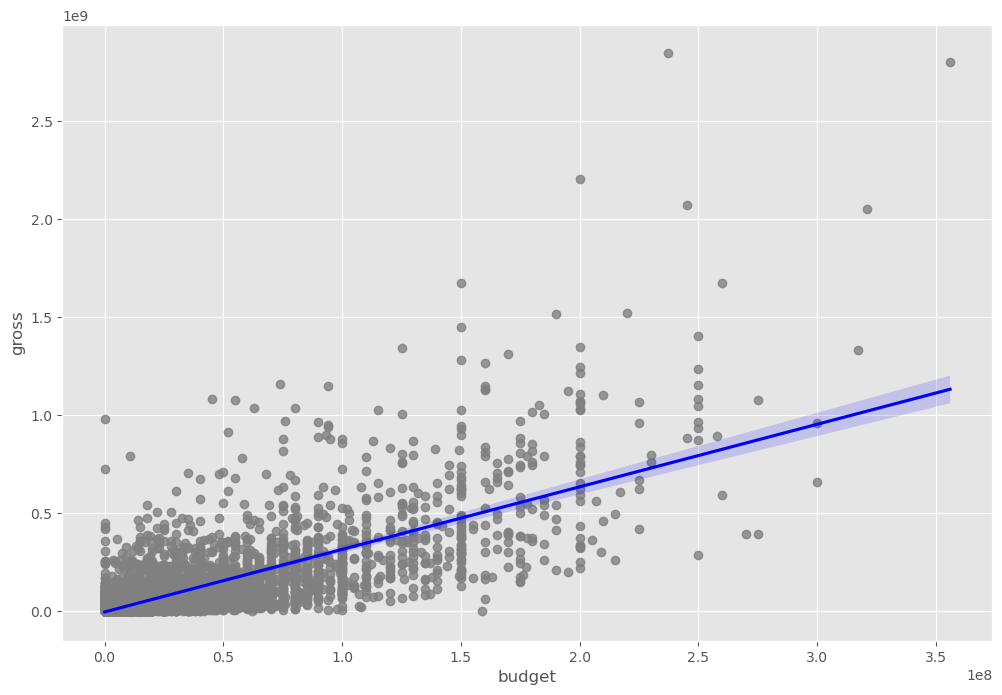

In [46]:
#reg plot (budget vs gross using seaborn)


sns.regplot(x='budget',y='gross',data=df ,scatter_kws={"color": "gray"},line_kws={"color":"blue"})

In [49]:
#correlation
df.corr(method='pearson') #pearson , kendall , spearman

C:\Users\Omar Mohamed\AppData\Local\Temp\ipykernel_2780\2645624097.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson') #pearson , kendall , spearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


C:\Users\Omar Mohamed\AppData\Local\Temp\ipykernel_2780\1648081106.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


Text(120.72222222222221, 0.5, 'Movie Feqatures')

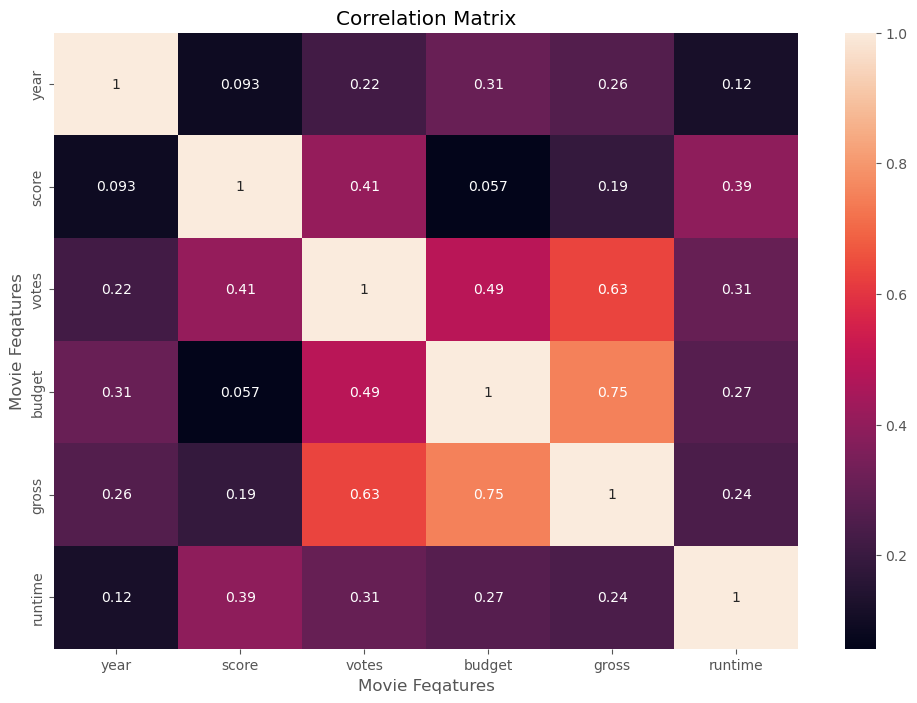

In [51]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix,annot=True)

plt.title ('Correlation Matrix')
plt.xlabel('Movie Feqatures')
plt.ylabel('Movie Feqatures')

In [57]:
#nummerization changing non int to int sort of
df_n = df
for col in df_n.columns :
    if (df_n[col].dtype=='object'):
        df_n[col]=df_n[col].astype('category')
        df_n[col]=df_n[col].cat.codes
        
df_n

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,l
5445,533,6,0,2009,697,7.8,1100000.0,1155,1779,2335,56,237000000,2847246203,2254,162.0,29,335
7445,535,6,0,2019,184,8.4,903000.0,162,744,2242,56,356000000,2797501328,1607,181.0,39,520
3045,6896,6,6,1997,705,7.8,1100000.0,1155,1779,1596,56,200000000,2201647264,2254,194.0,17,146
6663,5144,6,0,2015,699,7.8,876000.0,1125,2551,525,56,245000000,2069521700,1541,138.0,35,459
7244,536,6,0,2018,193,8.4,897000.0,162,744,2242,56,321000000,2048359754,1607,149.0,38,504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,3712,7,5,1989,1278,4.5,274.0,117,83,2798,56,0,0,1160,92.0,10,89
1614,1745,7,10,1989,56,5.2,1300.0,1033,1744,167,55,0,0,147,85.0,9,79
1606,2691,7,8,1989,258,6.0,2900.0,2743,947,1196,7,0,0,2238,89.0,9,79
1601,3836,0,4,1989,1161,7.1,1500.0,1105,1697,682,19,0,0,505,104.0,10,84


Text(120.72222222222221, 0.5, 'Movie Feqatures')

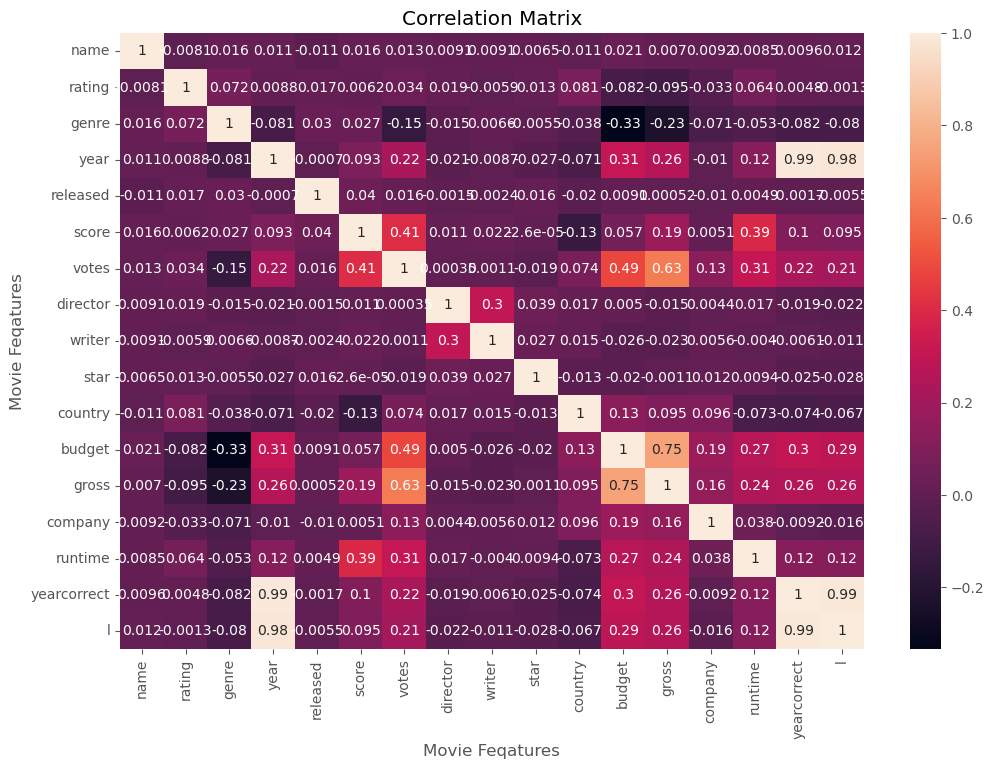

In [58]:
correlation_matrix = df_n.corr(method='pearson')

sns.heatmap(correlation_matrix,annot=True)

plt.title ('Correlation Matrix')
plt.xlabel('Movie Feqatures')
plt.ylabel('Movie Feqatures')

In [65]:
corr_mat = df_n.corr()
corr_pairs = corr_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.016377
             votes          0.013038
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009212
             runtime        0.008483
             yearcorrect    0.009553
             l              0.012348
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score          0.006192
             votes          0.033743
             director       0.019483
             writer        -0.005921
             star           0.013405
 

In [67]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs


budget       genre         -0.334021
genre        budget        -0.334021
             gross         -0.234297
gross        genre         -0.234297
genre        votes         -0.145296
votes        genre         -0.145296
score        country       -0.133346
country      score         -0.133346
gross        rating        -0.095450
rating       gross         -0.095450
genre        yearcorrect   -0.082070
yearcorrect  genre         -0.082070
budget       rating        -0.081939
rating       budget        -0.081939
genre        year          -0.081261
year         genre         -0.081261
l            genre         -0.080101
genre        l             -0.080101
country      yearcorrect   -0.074166
yearcorrect  country       -0.074166
country      runtime       -0.073319
runtime      country       -0.073319
genre        company       -0.071066
company      genre         -0.071066
year         country       -0.070938
country      year          -0.070938
             l             -0.067298
l

In [68]:
pd.set_option('display.max_rows',None)

In [70]:
high_corr=sorted_pairs[(sorted_pairs)>.5]
high_corr

gross        votes          0.632870
votes        gross          0.632870
budget       gross          0.750157
gross        budget         0.750157
year         l              0.980716
l            year           0.980716
yearcorrect  l              0.985065
l            yearcorrect    0.985065
yearcorrect  year           0.992136
year         yearcorrect    0.992136
name         name           1.000000
writer       writer         1.000000
runtime      runtime        1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
yearcorrect  yearcorrect    1.000000
l            l              1.000000
d